In [203]:
# import libraries to import, operate and visualize the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [204]:
# loading the customer demographic data from Customer_Demographic sheet on Raw_data excel file.
cust_demo = pd.read_excel("Raw_data.xlsx", sheet_name= "CustomerDemographic")

In [205]:
# checking first 5 rows using .head() from customer demographics Data.
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [206]:
# information of the columns and data-types of customer demographics data.
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [207]:
print("Total rows(records) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns(features) in the dataset : {}".format(cust_demo.shape[1]))

# or

# cust_demo.shape

Total rows(records) in the dataset : 4000
Total columns(features) in the dataset : 13


In [208]:
cust_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [209]:
cust_demo.describe(include= 'object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [210]:
cust_demo.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [211]:
# check for columns with numeric and non-numeric values.

#numeric columns
df_numeric= cust_demo.select_dtypes(include= [np.number])
numeric_cols= df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']


In [212]:
#non-numeric columns.
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols= df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


# 1. Dropping  Irrelevant Columns

We will remove **default** column from dataset as it it irrelevant.

In [213]:
# drop irrelevant columns from the dataset

cust_demo.drop(labels={'default'}, axis= 1, inplace= True)

# 2. Missing Values Check

In [214]:
# check for missing values

cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [215]:
# check for percentage of missing values

cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

 As we can see Last_name, DOB, job_title, job_industry_categor and tenure have missing values.

<Axes: >

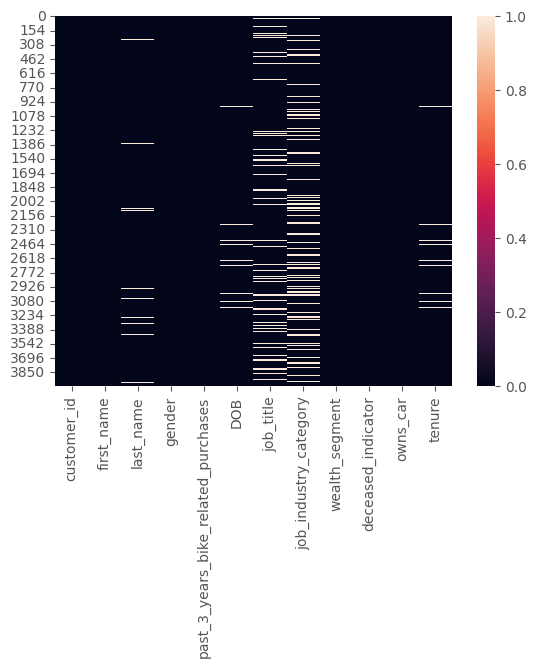

In [216]:
#Missing values using heatmap

sns.heatmap(cust_demo.isnull())

## 2.1 Last Name

In [217]:
# Matching in data where first_name and customer_id are present but last_name is missing.

cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

As all the customers have a customer_id and first_name, all the customers are identifiable. Hence it is okay to not have a last name. Now filling replacing the null last_names with "None".

In [218]:
# get the records where last_name is missing.

cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [219]:
cust_demo['last_name'].fillna('None', axis=0, inplace= True)

In [220]:
cust_demo['last_name'].isnull().sum()

0

Now there are no missing values for the column 'last_name'.

## 2.2 DOB

In [221]:
#2. Now for the column DOB(Date of birth)

cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [222]:
# round the percentage of null values in the DOB column of customer_demographics dataset.
round(cust_demo['DOB'].isnull().mean()*100)

2

The value null of DOB is 2% which is less than 5% of the data. SO we can remove the rows where the DOB is null.

In [223]:
dob_index_drop= cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [224]:
cust_demo.drop(index= dob_index_drop, axis= 0, inplace= True)

In [225]:
cust_demo['DOB'].isnull().sum()

0

Now there are no missing values for DOB column

## 2.3 Job Title

In [226]:
# Missing values of 'Job title'

cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0


We have percentage of null values in job title column 13%. Here we will replace Null values with 'missing'

In [227]:
cust_demo['job_title'].nunique()

195

In [228]:
cust_demo['job_title'].value_counts()

Business Systems Development Analyst    43
Tax Accountant                          43
Social Worker                           42
Recruiting Manager                      41
Internal Auditor                        40
                                        ..
Database Administrator II                4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [229]:
cust_demo['job_title'].mode()

0    Business Systems Development Analyst
1                          Tax Accountant
Name: job_title, dtype: object

In [230]:
job_title_mode = cust_demo['job_title'].mode()[0]
cust_demo['job_title'].fillna(job_title_mode, inplace= True)

In [231]:
cust_demo['job_title'].isnull().sum()

0

Now we have no null values for 'job_title' column

## 2.4 Job Industry Category

In [232]:
# job_industry_category

cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0


In [233]:
cust_demo['job_industry_category'].nunique()

9

In [234]:
cust_demo['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [235]:
cust_demo['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

We have 16% of null values in job_industry_category. So will will replace value with 'Missing'.

In [236]:
cust_demo['job_industry_category'].fillna('Missing', inplace= True, axis= 0)

In [237]:
cust_demo['job_industry_category'].isnull().sum()

0

## 2.5 Tenure

In [238]:
# When the 'DOB' was Null, 'tenure' was also Null and as I removed null values of 'DOB' from dataframe, null values from 'tenure'were also removed.

cust_demo['tenure'].isnull().sum()

0

Now we have no null/missing values in the dataset

In [239]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [240]:
print("Total records after removing the missing values : {}".format(cust_demo.shape[0]))

Total records after removing the missing values : 3913


# 3. Inconsistency Check

## 3.1 Gender

We can check now for inconsistant data/ or typing error data is present in the categorical columns. We will check the columns 'gender', 'wealth_segment', 'deceased_indicator', 'owns_car' for this.

In [241]:
# Gender

cust_demo['gender'].value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

In [242]:
# replace the typing errors and mistakes in a manner where F with Female, Femal with Female and M with Male.

def replace_gender_names(gender):
  if gender == 'M':
    return 'Male'
  elif gender == 'F':
    return 'Female'
  elif gender == 'Femal':
    return 'Female'
  else:
    return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [243]:
cust_demo['gender'].value_counts()

Female    2039
Male      1873
U            1
Name: gender, dtype: int64

## 3.2 DOB

In [244]:
cust_demo['DOB']

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3994   1975-12-12
3995   1975-08-09
3996   2001-07-13
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 3913, dtype: datetime64[ns]

Creating Age column for checking further descripency in data.

In [245]:
# First changing the DOB column in datetime format.

cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])

# creating a function to calculate the age as of today based on the DOB of the customer

def age(born):
  today= date.today()

  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_demo['age'] = cust_demo['DOB'].apply(age)
print(cust_demo['age'])

0       69
1       42
2       69
3       61
4       46
        ..
3994    47
3995    48
3996    22
3998    49
3999    31
Name: age, Length: 3913, dtype: int64


Creating Age groups for further analysis

In [246]:
cust_demo['age_group'] = pd.cut(cust_demo['age'], bins= [0,20,30,40,50,60,70,80,90], labels= ['20', '30', '40', '50', '60', '70', '80', '90'])

Other way is to use the Lambda function

In [247]:
#cust_demo['age_group'] = cust_demo['age'].apply(Lambda x : (math.floor(x/10)+1)*10)

In [248]:
cust_demo.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,70
3,4,Talbot,None,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61,70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,50
5,6,Curr,Duckhouse,Male,35,1966-09-16,Business Systems Development Analyst,Retail,High Net Worth,N,Yes,13.0,56,60
6,7,Fina,Merali,Female,6,1976-02-23,Business Systems Development Analyst,Financial Services,Affluent Customer,N,Yes,11.0,47,50
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,Missing,Mass Customer,N,No,7.0,61,70
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,34,40


<Axes: xlabel='age_group'>

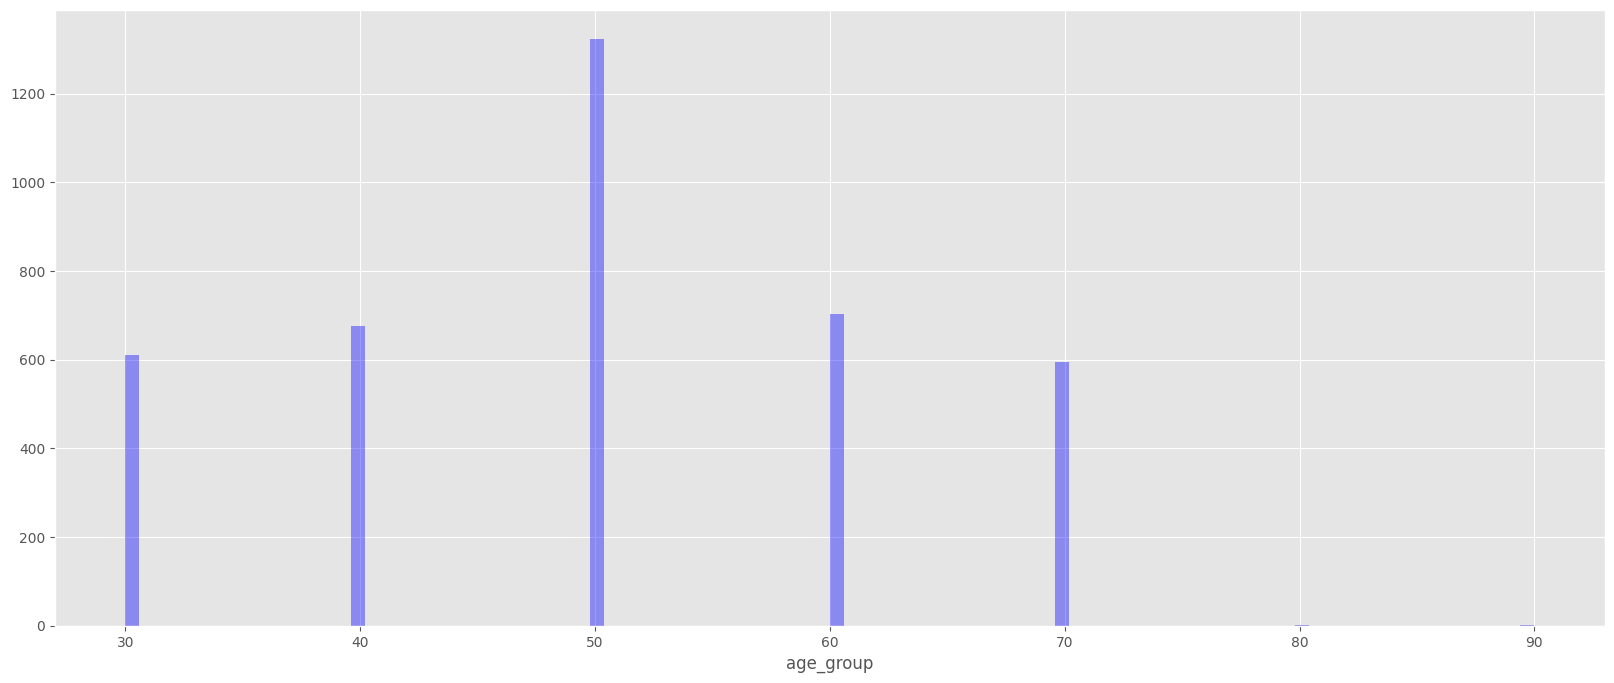

In [249]:
# now visualize to figure out the age distribution

plt.figure(figsize= (20,8))
#plt.xlim(0, 110)
sns.distplot(cust_demo['age_group'], kde=False, bins=100, color= 'blue')

## 3.3 Wealth Segment

In [250]:
cust_demo['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64

There is no inconsistant data in 'wealth_segment'

## 3.4 Deceased Indicator

In [251]:
cust_demo['deceased_indicator'].value_counts()

N    3911
Y       2
Name: deceased_indicator, dtype: int64

## 3.5 Owns_car

In [252]:
cust_demo['owns_car'].value_counts()

Yes    1974
No     1939
Name: owns_car, dtype: int64

Now Checking for duplicate values and removing if any.

# 4. Duplication Check

In [253]:
#Dropping the primary key column i.e. customer_id and storing in a temporary dataframe.
cust_demo_dedupped= cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3913
Number of records in original dataset : 3913


It's clear that there are no duplicates in the dataset.

# 5. Outlier Check

<Axes: >

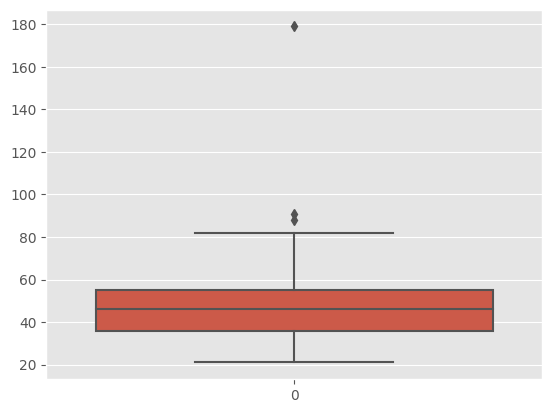

In [254]:
sns.boxplot(cust_demo['age'])

<Axes: xlabel='age'>

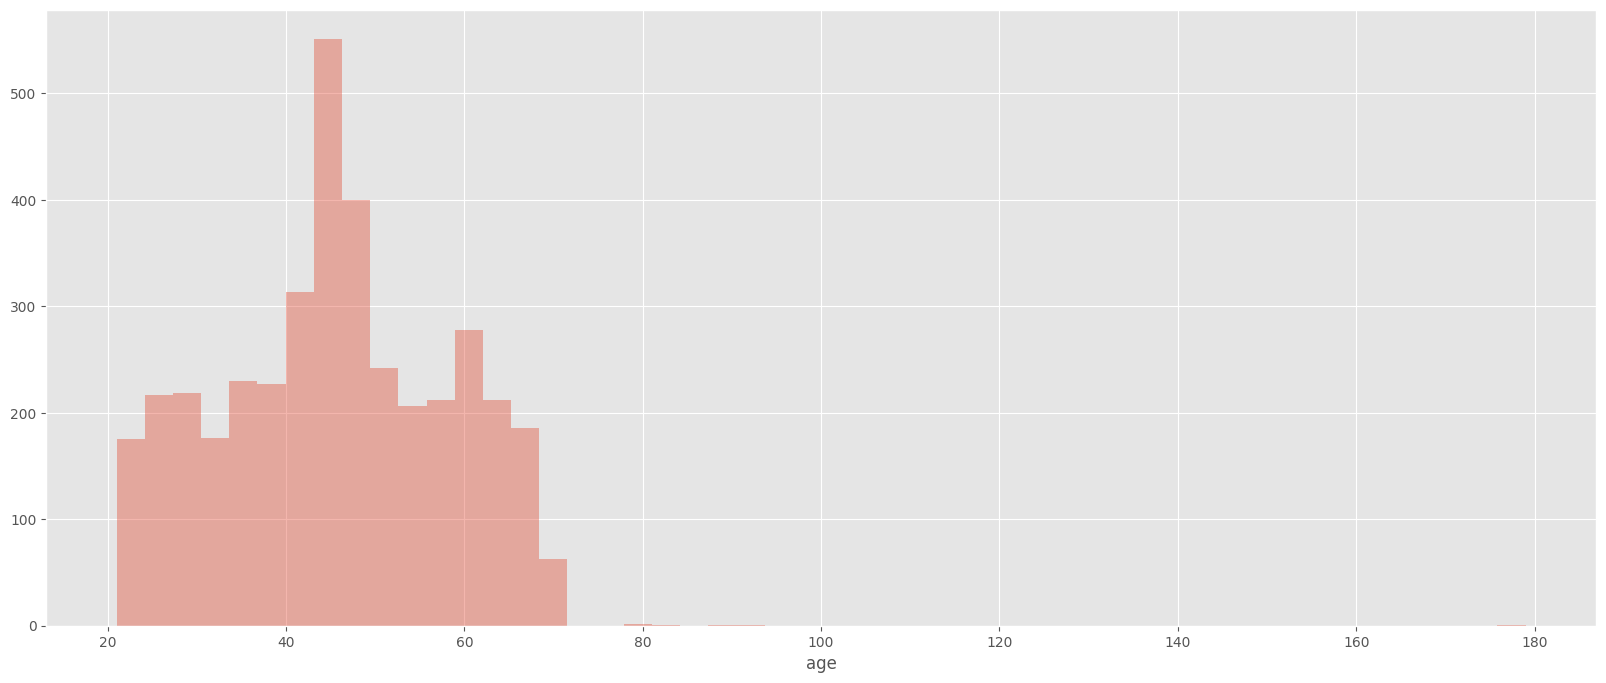

In [255]:
plt.figure(figsize = (20, 8))
sns.distplot(cust_demo['age'], kde= False, bins= 50)

It is visible from the graphs above that there are possible outliers in 'age' column with values greater than 100-

In [256]:
cust_demo['age'].describe()

count    3913.000000
mean       45.660618
std        12.801570
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       179.000000
Name: age, dtype: float64

We have 1 customer with an age of 179, which is clearly an outlier since the 75% of age is 53.

In [257]:
cust_demo[cust_demo['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,179,NaN


this one customer with 'age' 179 is an outlier. We need to remove this from the records.

In [258]:
age_index_drop = cust_demo[cust_demo['age']>100].index

cust_demo.drop(index= age_index_drop, inplace= True, axis= 0)

# 6. Export cleaned data as CSV

In [259]:
cust_demo.to_csv('Customer_Demographic_cleaned.csv', index= False)